<a href="https://colab.research.google.com/github/jaicdev/Jetson_configuration/blob/main/Face_detection_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Face Recognition using K-Nearest Neighbors and Principal Component Analysis (PCA)

1. Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

2. Loading and Understanding the Dataset

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

print("Number of samples:", len(lfw_people.images))
print("Image dimensions:", lfw_people.images.shape[1:])
print("Number of features:", lfw_people.data.shape[1])
print("Number of classes:", len(lfw_people.target_names))


Number of samples: 1288
Image dimensions: (50, 37)
Number of features: 1850
Number of classes: 7


3. Visualizing Sample Images

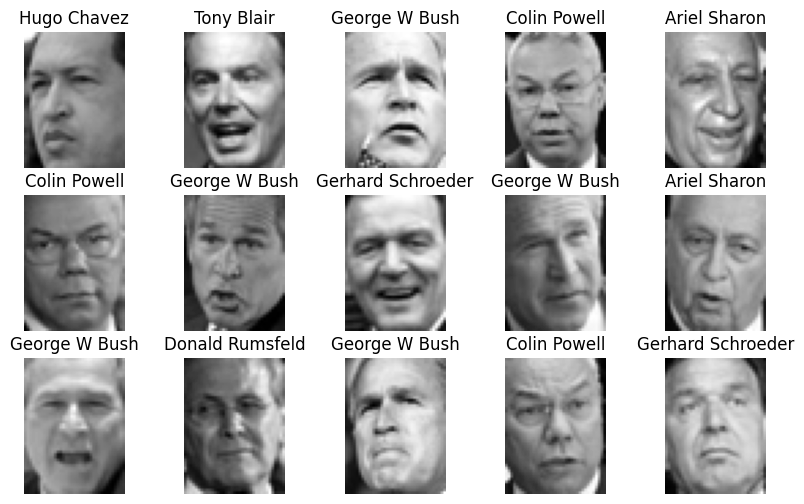

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(lfw_people.images[i], cmap='gray')
    plt.title(lfw_people.target_names[lfw_people.target[i]])
    plt.axis('off')
plt.show()


4. Preprocessing Data and Splitting into Training and Testing Sets

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(lfw_people.data)


5. Training KNN Classifier without PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


6. Applying PCA for Dimensionality Reduction

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
print("Classification report without PCA:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification report without PCA:
                   precision    recall  f1-score   support

     Ariel Sharon       0.39      0.54      0.45        13
     Colin Powell       0.59      0.65      0.62        60
  Donald Rumsfeld       0.52      0.52      0.52        27
    George W Bush       0.71      0.79      0.75       146
Gerhard Schroeder       0.33      0.24      0.28        25
      Hugo Chavez       0.56      0.33      0.42        15
       Tony Blair       0.71      0.42      0.53        36

         accuracy                           0.63       322
        macro avg       0.54      0.50      0.51       322
     weighted avg       0.62      0.63      0.62       322



7. Training KNN Classifier with PCA

In [ ]:
n_components = 0.95
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original number of features: {n_features}, Reduced number of features: {X_train_pca.shape[1]}")


Original number of features: 1850, Reduced number of features: 160


8. Visualizing Eigenfaces

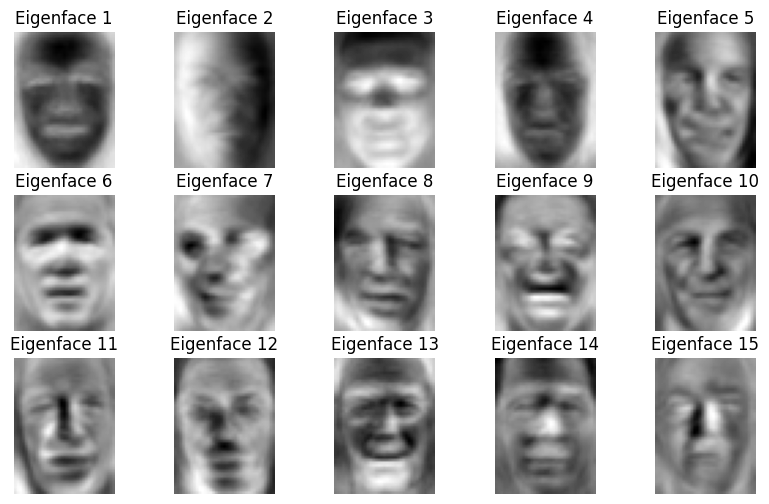

In [ ]:
eigenfaces = pca.components_.reshape((pca.components_.shape[0], h, w))

# Visualizing eigenfaces using the predefined function plot_eigenfaces
def plot_eigenfaces(eigenfaces, h, w, rows=3, cols=5):
    plt.figure(figsize=(10, 6))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(eigenfaces[i], cmap='gray')
        plt.title(f"Eigenface {i+1}")
        plt.axis('off')
    plt.show()

plot_eigenfaces(eigenfaces, h, w)

In [ ]:
knn_classifier_pca = KNeighborsClassifier(n_neighbors=5)
knn_classifier_pca.fit(X_train_pca, y_train)

y_pred_pca = knn_classifier_pca.predict(X_test_pca)
print("Classification report with PCA:")
print(classification_report(y_test, y_pred_pca, target_names=target_names))


Classification report with PCA:
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.15      0.24        13
     Colin Powell       0.97      0.63      0.77        60
  Donald Rumsfeld       0.52      0.44      0.48        27
    George W Bush       0.64      0.99      0.77       146
Gerhard Schroeder       0.80      0.32      0.46        25
      Hugo Chavez       1.00      0.20      0.33        15
       Tony Blair       0.82      0.39      0.53        36

         accuracy                           0.69       322
        macro avg       0.75      0.45      0.51       322
     weighted avg       0.74      0.69      0.65       322

